In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math
import skimage.io as imutils
%matplotlib inline
from keras.models import load_model
from keras.preprocessing import image as keras_preprocess
import os

Using TensorFlow backend.


In [45]:
#Image structure = > (Height, Width, Color_Channel)
cat_image = Image.open('custom_test/cat.7.jpg')
#Load the Classifier
classifier = load_model('my_model.h5')

# Returns the labels for the classes according to the folder structre of clases
def get_labels_for_clases():
    #return ['car', 'cat', 'dog', 'shoe']
    return ['car' ,'cat', 'dog']

# Run prediction for a single image
def predict_for_single_image(image):
    #lable the images according the folder structure

    lables = get_labels_for_clases()
    out = classifier.predict_classes(image, verbose=0)
    return lables[out[0]]

In [46]:
#save the image cordinates in a dictionary
image_cordinates_grid = {}

image_dimention_width = cat_image.size[0]
image_dimention_height = cat_image.size[1]

#if 100 x 100 window were to slide thought the image, identify the parameters for the loop condition
slide_window_height_and_width = (512, 512)

#Convert the image in to an numpy array
image_array = np.array(cat_image)

row_count_after_substraction = math.ceil(image_array.shape[0] / slide_window_height_and_width[0])
col_count_after_substraction = math.ceil(image_array.shape[1] / slide_window_height_and_width[1])

#Initialize x, y, w, h values
x, y, w, h = 0, 0, slide_window_height_and_width[1], slide_window_height_and_width[0]
count = 0
print("Image will be transformed in to a", row_count_after_substraction, "x", col_count_after_substraction, "grid")
for row in range(0, row_count_after_substraction):
    for col in range(0, col_count_after_substraction):
        
        #Change the X and Y locations respectivly to add the sliding window effect.
        cropped_image = image_array[y : y + h, x : x + w]
        saving_image = cropped_image
        #Save the image
        imutils.imsave("custom_test/cutted/" + str(count) + ".jpg",cropped_image)
        image_cordinates_grid['rect_' + str(count)] = (x, y, w, h)

        cropped_image = keras_preprocess.load_img('custom_test/cutted/' + str(count) + ".jpg", target_size=((64, 64)))
        cropped_image = keras_preprocess.img_to_array(cropped_image)
        cropped_image = np.expand_dims(cropped_image, axis=0)
        image_cordinates_grid['prediction_' + str(count)] = predict_for_single_image(cropped_image)
        
        #Delete existing image
        os.remove("custom_test/cutted/" + str(count) + ".jpg")
        #Lable image
        imutils.imsave("custom_test/cutted/" + str(count) + "_" + predict_for_single_image(cropped_image) + ".jpg",saving_image)
        x = x + w
        count = count + 1
    x = 0
    y = y + h


Image will be transformed in to a 4 x 5 grid


c:\anaconda3\envs\tftest\lib\site-packages\skimage\io\_io.py:132: UserWarning: custom_test/cutted/0.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
c:\anaconda3\envs\tftest\lib\site-packages\skimage\io\_io.py:132: UserWarning: custom_test/cutted/0_cat.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
c:\anaconda3\envs\tftest\lib\site-packages\skimage\io\_io.py:132: UserWarning: custom_test/cutted/1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
c:\anaconda3\envs\tftest\lib\site-packages\skimage\io\_io.py:132: UserWarning: custom_test/cutted/1_cat.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
c:\anaconda3\envs\tftest\lib\site-packages\skimage\io\_io.py:132: UserWarning: custom_test/cutted/5.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
c:\anaconda3\envs\tftest\lib\site-packages\skimage\io\_io.py:132: UserWarning: custom_test/cutted/5_cat.jpg is a low contrast i

In [38]:
image_cordinates_grid

{'prediction_0': 'cat',
 'prediction_1': 'dog',
 'prediction_10': 'dog',
 'prediction_11': 'dog',
 'prediction_12': 'car',
 'prediction_13': 'cat',
 'prediction_14': 'cat',
 'prediction_15': 'cat',
 'prediction_16': 'dog',
 'prediction_17': 'cat',
 'prediction_18': 'cat',
 'prediction_19': 'dog',
 'prediction_2': 'dog',
 'prediction_20': 'dog',
 'prediction_21': 'dog',
 'prediction_22': 'cat',
 'prediction_23': 'cat',
 'prediction_24': 'cat',
 'prediction_25': 'cat',
 'prediction_26': 'dog',
 'prediction_27': 'cat',
 'prediction_28': 'dog',
 'prediction_29': 'cat',
 'prediction_3': 'dog',
 'prediction_30': 'dog',
 'prediction_31': 'dog',
 'prediction_32': 'cat',
 'prediction_33': 'cat',
 'prediction_34': 'dog',
 'prediction_4': 'dog',
 'prediction_5': 'car',
 'prediction_6': 'dog',
 'prediction_7': 'cat',
 'prediction_8': 'cat',
 'prediction_9': 'car',
 'rect_0': (0, 0, 512, 512),
 'rect_1': (512, 0, 512, 512),
 'rect_10': (1536, 512, 512, 512),
 'rect_11': (2048, 512, 512, 512),
 'rec

In [56]:
#Extract the relevent image cell to its corresponding prediction
iteration_size = math.ceil(len(image_cordinates_grid) / 2)
combined_grid = {}
#Compare adjesent cells for the same prediction and combine them
for i in range(0, iteration_size - 1):
    if image_cordinates_grid['prediction_' + str(i)] == image_cordinates_grid['prediction_' + str(i + 1)]:
        #Join the regions
        combined_grid['prediction_' + str(i)] = image_cordinates_grid['prediction_' + str(i)]
        cordinate_1 = image_cordinates_grid['rect_' + str(i)]
        cordinate_2 = image_cordinates_grid['rect_' + str(i + 1)]
        
        #Join only in X axis
        if cordinate_1[1] == cordinate_2[1]:
            combined_grid['rect_' + str(i)] = (cordinate_1[0], cordinate_1[1], cordinate_1[2] + cordinate_2[2], cordinate_1[3])

In [57]:
combined_grid

{'prediction_0': 'cat',
 'prediction_1': 'cat',
 'prediction_10': 'cat',
 'prediction_11': 'cat',
 'prediction_13': 'dog',
 'prediction_15': 'cat',
 'prediction_17': 'dog',
 'prediction_4': 'cat',
 'prediction_5': 'cat',
 'prediction_6': 'cat',
 'prediction_8': 'dog',
 'rect_0': (0, 0, 1024, 512),
 'rect_1': (512, 0, 1024, 512),
 'rect_10': (0, 1024, 1024, 512),
 'rect_11': (512, 1024, 1024, 512),
 'rect_13': (1536, 1024, 1024, 512),
 'rect_15': (0, 1536, 1024, 512),
 'rect_17': (1024, 1536, 1024, 512),
 'rect_5': (0, 512, 1024, 512),
 'rect_6': (512, 512, 1024, 512),
 'rect_8': (1536, 512, 1024, 512)}

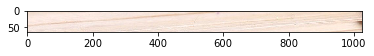

In [66]:
x,y,w,h = combined_grid['rect_15']
image = image_array[y : y + h, x : x + w]
plt.imshow(image)

In [ ]:
'''
Use this method to identify the possible regions and then re run the same GPD algorithm to identify the correct region
'''